Цель - сгенерировать случайную величину по известной плотности распределения

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import scipy

Создаем точки, записываем в файл input.txt

In [ ]:
x_maxmin=10
y_maxmin=10
N=1000

X = np.linspace(-x_maxmin, x_maxmin, N)
Y = np.linspace(-y_maxmin, y_maxmin, N)
# получаем координаты
x, y = np.meshgrid(X, Y)


with open('input.txt', 'w') as file:
    for i in range(N):
        for j in range(N):
            file.write(f"{x[i, j]} {y[i,j]}\n")

Запускаем exe файл на компьютере. Получим значение функции полтергейста в этой точке. Это плотность вероятности

In [ ]:
z = np.zeros((N, N))

with open('plst_dstr.txt', 'r') as file:
    for i in range(N):
        for j in range(N):
            z[i,j] = float(file.readline())

Рисуем, как выглядят полученные данные

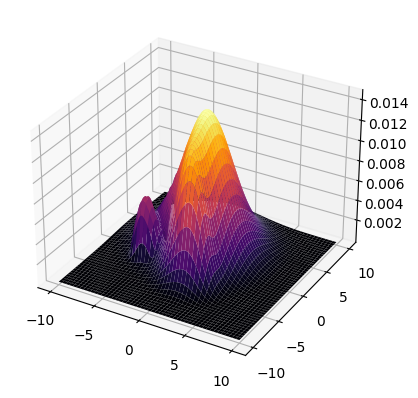

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap='inferno')

Метод численного интегрирования, формула симпсона.
Чтобы найти функцию распределения, интегрируем сначала по Y, потом по X.

Находим конкретное значение х как обратную функцию распределения.

Находим условную функцию распределения.

Находим конкретное значение у

In [ ]:
# бинарный поиск случайной величины
def bin(tau, F):
    l=0
    r=N
    while r-l>1:
        if F[(l+r)//2]<tau:
            l=(l+r)//2
        else:
            r=(l+r)//2
    return (l+r)//2

In [ ]:
integr_y=[]

# 1 шаг - интегрируем
for i in range(N):
    integr_y.append(scipy.integrate.simps(z[i,:], Y)) # интегрирование только по 1 оси по всему Y

Fx=[0]

for i in range(1,N):
    Fx.append(scipy.integrate.simps(integr_y[:i], X[:i])) # интегрирование только по X

Fx=np.array(Fx)/Fx[-1] #нормализация

# задаем, сколько хотим получить количество точек в результате
result = np.zeros((N,2))

for i in range(N):
    tau=np.random.random() # сл. в.в интервале от 0 до  1

    # конкретная точка х. для условной функции распределения
    x0=bin(tau, Fx)

    Fy=[0]

    for j in range(1, N):
        Fy.append(scipy.integrate.simps(z[x0, :j], Y[:j]))

    Fy=np.array(Fy)/Fy[-1] #нормировка

    tau=np.random.random()
    # конкретная точка y
    y0=bin(tau, Fy)

    result[i,0]=X[x0]
    result[i,1]=Y[y0]


<ipython-input-161-328388d63857>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('plasma')


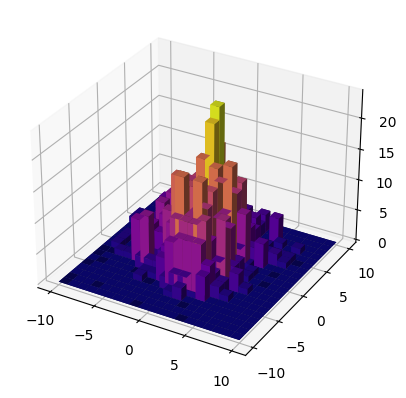

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(result[:,0], result[:,1], bins=20, range=[[-10, 10], [-10, 10]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:]) - (xedges[1] - xedges[0])

xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx=xedges[1] - xedges[0]
dy=yedges[1] - yedges[0]
dz = hist.flatten()

cmap=cm.get_cmap('plasma')
norm=matplotlib.colors.Normalize(vmin=min(dz), vmax=max(dz))
colors=cmap(norm(dz))

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=colors)

plt.show()